<a href="https://colab.research.google.com/github/ekalachev/forex_trading/blob/main/Forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install yfinance

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

The `yfinance` library returns a Pandas DataFrame with the following columns:

- **Open**: The opening price for the time period
- **High**: The highest price for the time period
- **Low**: The lowest price for the time period
- **Close**: The closing price for the time period
- **Volume**: The volume of trades for the time period


These columns contain the **OHLCV** (Open, High, Low, Close, Volume) data for the currency pair at each time period.

In [ ]:
# Get the historical data for the currency pair EUR/USD split by day
data = yf.download('EURUSD=X', start='2018-01-02', end='2023-01-06', interval="1d")

[*********************100%***********************]  1 of 1 completed


# Exploratory Data Analysis (EDA)

Here are some steps we can follow to do EDA on our dataset:

- Start by getting a high-level overview of the data. We can use the head() and describe() methods to get a feel for the data, including the number of rows and columns, the data types, and the range and distribution of the values.

- Look for missing or invalid values. We can use the isnull() and notnull() methods to identify rows with missing values, and the unique() method to see if there are any invalid or unexpected values.

- Visualize the data to get a better understanding of the patterns and relationships. We can use plots such as histograms, scatter plots, and box plots to visualize the distribution and relationships of the data.

- Check for correlations between the variables. We can use techniques such as scatter plots, heat maps, and Pearson's correlation coefficient to identify strong correlations between variables.

- Look for trends and patterns in the data. We can use techniques such as time series plots, rolling averages, and seasonality plots to identify trends and patterns in the data.

- Consider the context of the data. Make sure we understand the meaning and limitations of the data, and how it was collected. This can help you interpret the results and identify any potential biases or issues.

> By following these steps, we should be able to get a good understanding of our data and identify any potential challenges or issues. This can help us make informed decisions about how to analyze and model the data, and how to communicate our results.

// TODO work on EDA.

In [ ]:
# Print the head of the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1.201086,1.208094,1.200855,1.201158,1.201158,0
2018-01-03,1.206200,1.206709,1.200495,1.206345,1.206345,0
2018-01-04,1.201129,1.209190,1.200495,1.201043,1.201043,0
2018-01-05,1.206622,1.208459,1.202154,1.206884,1.206884,0
2018-01-08,1.203949,1.205400,1.195972,1.203746,1.203746,0


In [ ]:
data = data.drop(columns=["Adj Close", "Volume"])

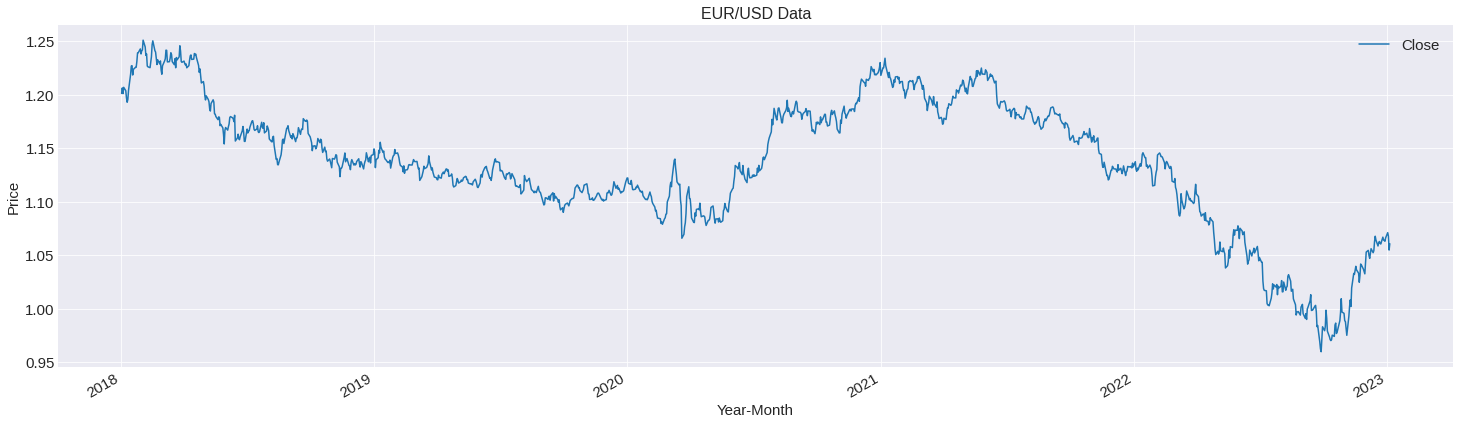

In [ ]:
# Plot the close price
plt.figure(figsize=(25, 7))
data['Close'].plot()

# Set the title and axis label
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

# Data preparation

Here, the `y_train` and `y_test` variables contain the `Close` column from the training and test data, respectively. These will be used as the target variables when training and evaluating the model.

In [ ]:
# Split the data into train and test sets
train_data = data[:int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]

# Get the training and test sets
X_train = train_data[['Open', 'High', 'Low']].values
X_test = test_data[['Open', 'High', 'Low']].values
y_train = train_data['Close'].values
y_test = test_data['Close'].values

# Scale the input data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the model

In [ ]:
# Build a LSTM model (MSE: 0.00004799, 500 epochs)
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [ ]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=500, batch_size=128, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/500
9/9 [==============================] - 15s 361ms/step - loss: 1.3097 - val_loss: 1.0451
Epoch 2/500
9/9 [==============================] - 0s 10ms/step - loss: 1.2221 - val_loss: 0.9594
Epoch 3/500
9/9 [==============================] - 0s 12ms/step - loss: 1.0953 - val_loss: 0.8399
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.8879 - val_loss: 0.6631
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 0.5357 - val_loss: 0.4080
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1396 - val_loss: 0.1728
Epoch 7/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0929 - val_loss: 0.1488
Epoch 8/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0594 - val_loss: 0.1759
Epoch 9/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0497 - val_loss: 0.1514
Epoch 10/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0376 - val_loss: 0.1124
Epoch 11/500
9/9 

# Evaluation

- Make predictions on the test data
- Evaluate the model using the mean squared error
- Plot the training and test loss
- Plot the predictions against the true values

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse:.8f}')

9/9 [==============================] - 1s 3ms/step
MSE: 0.00019188


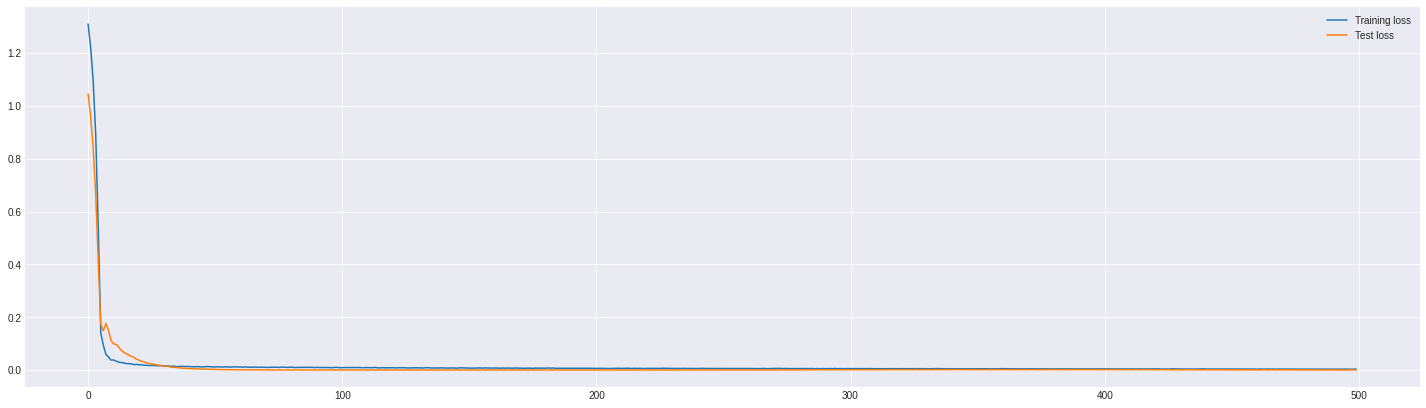

In [ ]:
# Plot the training and test loss
plt.figure(figsize=(25, 7))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend()
plt.show()

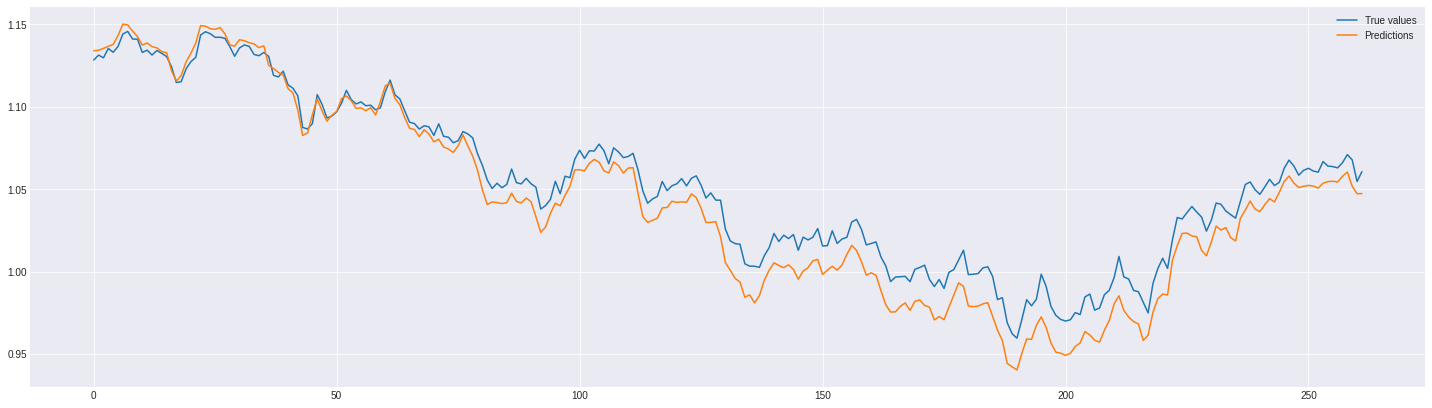

In [ ]:
# Plot the predictions against the true values
plt.figure(figsize=(25, 7))
plt.plot(y_test, label='True values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

# Conclusion
From the plot we can see that the real stock price went up/down while our model also predicted that the price of the stock will go up/down.